# IMPORT

In [119]:
import numpy as np
import pandas as pd
import pandas_profiling
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from bs4 import BeautifulSoup
import requests

# Дополнительные функции для удобства дальнейшей работы

# Обзор данных

## Тестовый датасет

In [120]:
# Посмотрим на датасет, который нам дан для сабмитта
data_test = pd.read_csv('test.csv')
data_test.info()
display(data_test.head(5))
print("Размер датасета cабмитта: {}".format(data_test.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,74000,2013,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.2 AMT (105 л.с.),5,1603226273,RUB,2014,1100575026,"{""id"":""10373605"",""displacement"":1197,""engine_t...",LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,60563,2017,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 MT (110 л.с.),5,1603226277,RUB,2017,1100549428,"{""id"":""20913311"",""displacement"":1598,""engine_t...",LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,88000,2013,"{""code"":""SUPERB"",""name"":""Superb"",""ru_name"":""Су...",SUPERB,DSG 1.8 AMT (152 л.с.),5,1603226280,RUB,2014,1100658222,"{""id"":""20026323"",""nameplate"":""DSG"",""displaceme...",LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,95000,2013,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 AT (110 л.с.),5,1603226284,RUB,2014,1100937408,"{""id"":""20105521"",""displacement"":1598,""engine_t...",LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,58536,2008,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.8 AT (152 л.с.),5,1603226288,RUB,2012,1101037972,"{""id"":""4561004"",""displacement"":1798,""engine_ty...",LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


Размер датасета cабмитта: (34686, 32)


In [121]:
sample = pd.read_csv('sample_submission.csv')
sample.info()
sample.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sell_id  34686 non-null  int64
 1   price    34686 non-null  int64
dtypes: int64(2)
memory usage: 542.1 KB


,sell_id,price
0,1100575026,0
1,1100549428,0
2,1100658222,0
3,1100937408,0
4,1101037972,0


In [122]:
# Проверяем, где есть пропуски и дубликаты
print("Дубликатов найдено:", data_test.duplicated(keep=False).sum())
print("Пропусков найдено:", data_test.isnull().sum().sum())
data_test.isnull().sum()

Дубликатов найдено: 0
Пропусков найдено: 60956


bodyType                    0
brand                       0
car_url                     0
color                       0
complectation_dict      28268
description                 0
engineDisplacement          0
enginePower                 0
equipment_dict           9996
fuelType                    0
image                       0
mileage                     0
modelDate                   0
model_info                  0
model_name                  0
name                        0
numberOfDoors               0
parsing_unixtime            0
priceCurrency               0
productionDate              0
sell_id                     0
super_gen                   0
vehicleConfiguration        0
vehicleTransmission         0
vendor                      0
Владельцы                   0
Владение                22691
ПТС                         1
Привод                      0
Руль                        0
Состояние                   0
Таможня                     0
dtype: int64

In [123]:
# Быстрое изучение
#pandas_profiling.ProfileReport(data_test)

In [124]:
display(data_test['Таможня'].value_counts())
display(data_test['priceCurrency'].value_counts())
data_test['Состояние'].value_counts()

Растаможен    34686
Name: Таможня, dtype: int64

RUB    34686
Name: priceCurrency, dtype: int64

Не требует ремонта    34686
Name: Состояние, dtype: int64

Три абсолютно неинформативных признака! Удаляем, чтобы не "таскать" за собой, как и ссылку на картинку.

Так же удалим признаки model_info и super_gen, name так как информация в них повторяется в других колонках. Признаки complectation_dict и "Владение" cодержат более 80% пропусков, equipment_dict более 20% пропусков, поэтому их мы тоже удалим. 

In [125]:
data_test.drop(['Таможня', 'Состояние', 'priceCurrency', 'model_info', 'name', 'image',
                'complectation_dict', 'equipment_dict', 'Владение', 'super_gen'], axis=1, inplace=True)

## Датасет для обучения после парсинга

In [126]:
data_train = pd.read_csv('auto_ru.csv')
data_train.info()
display(data_train.head(5))
print("Размер датасета для обучения: {}".format(data_train.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31754 entries, 0 to 31753
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            31754 non-null  int64 
 1   bodyType              31754 non-null  object
 2   brand                 31754 non-null  object
 3   car_url               31754 non-null  object
 4   color                 31754 non-null  object
 5   description           31754 non-null  object
 6   engineDisplacement    31754 non-null  object
 7   enginePower           31754 non-null  object
 8   fuelType              31754 non-null  object
 9   image                 31754 non-null  object
 10  mileage               31754 non-null  object
 11  modelDate             31754 non-null  int64 
 12  model_name            31754 non-null  object
 13  name                  31754 non-null  object
 14  numberOfDoors         31754 non-null  int64 
 15  parsing_unixtime      31754 non-null

,Unnamed: 0,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,fuelType,image,mileage,modelDate,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price
0,0,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x5_m/110359...,чёрный,Приобреталась у официального дилера. \nАвтомоб...,4.4 LTR,575 N12,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,53 000 км,2014,BMW X5 M II (F85),4.4 AT,5,1625776941,RUB,2015,№ 1103592126,ALLROAD_5_DOORS AUTOMATIC 4.4,автоматическая,1 владелец,Оригинал,полный,Левый,Не требует ремонта,Растаможен,4 350 000 ₽
1,1,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x3/11042126...,чёрный,Официальный дилерский центр РОЛЬФ Вешки предла...,2.0 LTR,184 N12,дизель,https://autoru.naydex.net/uT1R69J80/a21bafR1oS...,256 936 км,2010,BMW X3 II (F25) 20d xDrive,2.0 AT,5,1625776942,RUB,2012,№ 1104212609,ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,1 владелец,Оригинал,полный,Левый,Не требует ремонта,Растаможен,1 195 000 ₽
2,2,хэтчбек 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/1er/1104212...,чёрный,Официальный дилерский центр РОЛЬФ Вешки предла...,1.5 LTR,136 N12,бензин,https://autoru.naydex.net/uT1R69J80/a21bafR1oS...,120 000 км,2015,BMW 1 серии II (F20/F21) Рестайлинг 118i,1.5 AT,5,1625776944,RUB,2015,№ 1104212587,HATCHBACK_5_DOORS AUTOMATIC 1.5,автоматическая,1 владелец,Оригинал,задний,Левый,Не требует ремонта,Растаможен,1 200 000 ₽
3,3,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x6/11042127...,чёрный,WEEKEND продаж в РОЛЬФ Алтуфьево!\nТОЛЬКО 10 и...,3.0 LTR,381 N12,дизель,https://autoru.naydex.net/uT1R69J80/a21bafR1oS...,113 532 км,2014,BMW X6 II (F16) M50d,3.0 AT,5,1625776945,RUB,2016,№ 1104212713,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,2 владельца,Оригинал,полный,Левый,Не требует ремонта,Растаможен,3 750 000 ₽
4,4,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x6_m/110421...,синий,"Автосалонам, площадкам и прочим перекупам даже...",4.4 LTR,555 N12,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,139 000 км,2009,BMW X6 M I (E71),4.4 AT,5,1625776947,RUB,2011,№ 1104211691,ALLROAD_5_DOORS AUTOMATIC 4.4,автоматическая,2 владельца,Оригинал,полный,Левый,Не требует ремонта,Растаможен,1 700 000 ₽


Размер датасета для обучения: (31754, 28)


In [127]:
# Проверяем, где есть пропуски и дубликаты
print("Дубликатов найдено:", data_train.duplicated(keep=False).sum())
print("Пропусков найдено:", data_train.isnull().sum().sum())
data_train.isnull().sum()

Дубликатов найдено: 0
Пропусков найдено: 0


Unnamed: 0              0
bodyType                0
brand                   0
car_url                 0
color                   0
description             0
engineDisplacement      0
enginePower             0
fuelType                0
image                   0
mileage                 0
modelDate               0
model_name              0
name                    0
numberOfDoors           0
parsing_unixtime        0
priceCurrency           0
productionDate          0
sell_id                 0
vehicleConfiguration    0
vehicleTransmission     0
Владельцы               0
ПТС                     0
Привод                  0
Руль                    0
Состояние               0
Таможня                 0
price                   0
dtype: int64

In [128]:
# Удаляем неинформативные колонки
data_train.drop(['Unnamed: 0', 'name', 'Таможня', 'Состояние', 'priceCurrency', 'image'], axis=1, inplace=True)

### Дополняем датасет для обучения

В датасете в результате парсинга отсутствует признак vendor. Исправим это, "допарсив"

In [129]:
#vendor_list = []
#for i in range(0, len(data_train)):
#
#    if i % 500 == 0:  # Для контролирования прогресса работы
#        print(i)
#
#    response = requests.get(data_train.iloc[i].car_url)
#    response.encoding = 'utf8'
#    page = BeautifulSoup(response.text, 'html.parser')
#    try:
#        if 'EUROPEAN' in str(json.loads(page.find('script', type="application/json", id="initial-state").string)):
#            vendor_list.append('EUROPEAN')
#        else:
#            vendor_list.append('JAPANESE')
#    except:
#        vendor_list.append('')
#
#print(len(vendor_list))
#
#data_vendor = pd.DataFrame(vendor_list)
#data_vendor.to_csv('auto_vendor.csv')  # Cохраним в csv файл, чтобы каждый раз не парсить

In [130]:
# Открываем данные по признаку vendor
data_vendor = pd.read_csv('auto_vendor.csv', names=['vendor'], header=0)

# Добавляем признак vendor в обучающий датасет
data_train = data_train.join(data_vendor)

## Объединяем датасеты для предварительно обработки

In [131]:
data_train['train'] = 1   
data_test['train'] = 0    
data_test['price'] = -1  # Добавим в тестовый датасет целевую переменную, равную -1
data = data_train.append(data_test, sort=False).reset_index(drop=True)

In [132]:
data.info()
display(data)
print("Размер общего датасета: {}".format(data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66440 entries, 0 to 66439
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              66440 non-null  object
 1   brand                 66440 non-null  object
 2   car_url               66440 non-null  object
 3   color                 66440 non-null  object
 4   description           66440 non-null  object
 5   engineDisplacement    66440 non-null  object
 6   enginePower           66440 non-null  object
 7   fuelType              66440 non-null  object
 8   mileage               66440 non-null  object
 9   modelDate             66440 non-null  int64 
 10  model_name            66440 non-null  object
 11  numberOfDoors         66440 non-null  int64 
 12  parsing_unixtime      66440 non-null  int64 
 13  productionDate        66440 non-null  int64 
 14  sell_id               66440 non-null  object
 15  vehicleConfiguration  66440 non-null

,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,parsing_unixtime,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,ПТС,Привод,Руль,price,vendor,train
0,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x5_m/110359...,чёрный,Приобреталась у официального дилера. \nАвтомоб...,4.4 LTR,575 N12,бензин,53 000 км,2014,BMW X5 M II (F85),5,1625776941,2015,№ 1103592126,ALLROAD_5_DOORS AUTOMATIC 4.4,автоматическая,1 владелец,Оригинал,полный,Левый,4 350 000 ₽,EUROPEAN,1
1,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x3/11042126...,чёрный,Официальный дилерский центр РОЛЬФ Вешки предла...,2.0 LTR,184 N12,дизель,256 936 км,2010,BMW X3 II (F25) 20d xDrive,5,1625776942,2012,№ 1104212609,ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,1 владелец,Оригинал,полный,Левый,1 195 000 ₽,EUROPEAN,1
2,хэтчбек 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/1er/1104212...,чёрный,Официальный дилерский центр РОЛЬФ Вешки предла...,1.5 LTR,136 N12,бензин,120 000 км,2015,BMW 1 серии II (F20/F21) Рестайлинг 118i,5,1625776944,2015,№ 1104212587,HATCHBACK_5_DOORS AUTOMATIC 1.5,автоматическая,1 владелец,Оригинал,задний,Левый,1 200 000 ₽,EUROPEAN,1
3,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x6/11042127...,чёрный,WEEKEND продаж в РОЛЬФ Алтуфьево!\nТОЛЬКО 10 и...,3.0 LTR,381 N12,дизель,113 532 км,2014,BMW X6 II (F16) M50d,5,1625776945,2016,№ 1104212713,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,2 владельца,Оригинал,полный,Левый,3 750 000 ₽,EUROPEAN,1
4,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x6_m/110421...,синий,"Автосалонам, площадкам и прочим перекупам даже...",4.4 LTR,555 N12,бензин,139 000 км,2009,BMW X6 M I (E71),5,1625776947,2011,№ 1104211691,ALLROAD_5_DOORS AUTOMATIC 4.4,автоматическая,2 владельца,Оригинал,полный,Левый,1 700 000 ₽,EUROPEAN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66435,седан,BMW,https://auto.ru/cars/used/sale/bmw/3er/1101369...,коричневый,Продается BMW 316i в отличном состоянии. Прода...,1.6 LTR,136 N12,бензин,115000,2011,3ER,4,1603707643,2014,1101369263,SEDAN AUTOMATIC 1.6,автоматическая,3 или более,Оригинал,задний,Левый,-1,EUROPEAN,0
66436,седан,BMW,https://auto.ru/cars/used/sale/bmw/5er/1101369...,чёрный,Продаётся отличный автомобиль.,2.0 LTR,190 N12,дизель,98000,2016,5ER,4,1603707651,2018,1101369581,SEDAN AUTOMATIC 2.0,автоматическая,1 владелец,Оригинал,полный,Левый,-1,EUROPEAN,0
66437,седан,BMW,https://auto.ru/cars/used/sale/bmw/5er/1101364...,серый,Хорошее состояние,2.5 LTR,170 N12,бензин,360000,1995,5ER,4,1603707843,1997,1101364889,SEDAN AUTOMATIC 2.5,автоматическая,3 или более,Дубликат,задний,Левый,-1,EUROPEAN,0
66438,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x1/11013625...,коричневый,Автомобиль в идеальном состоянии . Куплен новы...,2.0 LTR,184 N12,дизель,90500,2012,X1,5,1603707909,2013,1101362518,ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,2 владельца,Оригинал,полный,Левый,-1,EUROPEAN,0


Размер общего датасета: (66440, 24)


# Работа с признаками

In [133]:
#pandas_profiling.ProfileReport(data)

In [134]:
data.drop(['car_url', 'parsing_unixtime', 'sell_id'], axis=1, inplace=True)

In [135]:
data.sample(5)

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,Владельцы,ПТС,Привод,Руль,price,vendor,train
13191,внедорожник 5 дв.,AUDI,белый,⚡️ 20 000 СКИДКА ПО TRADE-IN!!!\n⚡️ 20 000 СКИ...,2.0 LTR,170 N12,бензин,107 000 км,2011,Audi Q3 I (8U),5,2013,ALLROAD_5_DOORS ROBOT 2.0,роботизированная,3 или более,Оригинал,полный,Левый,1 249 990 ₽,EUROPEAN,1
65188,внедорожник 5 дв.,TOYOTA,коричневый,Автомобиль эксплуатируется с 17го года Автомоб...,2.0 LTR,146 N12,бензин,95000,2015,RAV_4,5,2016,ALLROAD_5_DOORS VARIATOR 2.0,вариатор,1 владелец,Оригинал,полный,Левый,-1,JAPANESE,0
36078,внедорожник 5 дв.,AUDI,белый,Состояние супер! Любая проверка. Обслуживается...,3.0 LTR,249 N12,дизель,170000,2015,Q7,5,2016,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,3 или более,Оригинал,полный,Левый,-1,EUROPEAN,0
35664,универсал 5 дв.,AUDI,бежевый,"На машине стоял 1.8 awm, сняли и поставили 2.8...",1.8 LTR,150 N12,бензин,300000,1999,A4,5,2000,WAGON_5_DOORS AUTOMATIC 1.8,автоматическая,3 или более,Дубликат,полный,Левый,-1,EUROPEAN,0
444,лифтбек,BMW,серый,Автомобиль представлен официальным дилером BMW...,3.0 LTR,249 N12,дизель,23 480 км,2017,BMW 6 серии Gran Turismo IV (G32) 630d xDrive,5,2019,LIFTBACK AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый,5 200 000 ₽,EUROPEAN,1


In [136]:
data.vendor.value_counts()

EUROPEAN    34079
JAPANESE    32353
Name: vendor, dtype: int64

In [148]:
data.groupby('brand').vendor.value_counts()

brand       vendor  
AUDI        EUROPEAN    5733
            JAPANESE     350
BMW         EUROPEAN    6718
            JAPANESE     310
HONDA       JAPANESE    4656
INFINITI    JAPANESE    2490
LEXUS       JAPANESE    3522
MERCEDES    EUROPEAN    6125
            JAPANESE     294
MITSUBISHI  JAPANESE    5683
NISSAN      JAPANESE    7185
            EUROPEAN       1
SKODA       EUROPEAN    4948
            JAPANESE     455
TOYOTA      JAPANESE    6691
VOLKSWAGEN  EUROPEAN    6703
            JAPANESE     419
VOLVO       EUROPEAN    3851
            JAPANESE     298
Name: vendor, dtype: int64

In [138]:
data[data.vendor.isnull() == True]

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,Владельцы,ПТС,Привод,Руль,price,vendor,train
2808,седан,VOLKSWAGEN,белый,Автомобиль приобретался у официального дилера....,1.6 LTR,110 N12,бензин,60 454 км,2014,Volkswagen Polo V Рестайлинг,4,2019,SEDAN MECHANICAL 1.6,механическая,2 владельца,Оригинал,передний,Левый,789 000 ₽,NaN,1
4432,внедорожник 5 дв.,VOLKSWAGEN,чёрный,Авто в отличном техническом состоянии. Вложени...,3.0 LTR,245 N12,дизель,135 000 км,2010,Volkswagen Touareg II,5,2012,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,2 владельца,Оригинал,полный,Левый,1 800 000 ₽,NaN,1
6913,хэтчбек 5 дв.,NISSAN,синий,1 владелец\nАвтомобиль продается от официально...,1.6 LTR,110 N12,бензин,60 855 км,2008,Nissan Note I Рестайлинг,5,2013,HATCHBACK_5_DOORS AUTOMATIC 1.6,автоматическая,1 владелец,Оригинал,передний,Левый,620 000 ₽,NaN,1
11809,внедорожник 3 дв.,TOYOTA,серый,Очень крепкий и выносливый рамный внедорожник!...,2.0 LTR,105 N12,бензин,258 000 км,1984,Toyota Hilux Surf I,3,1987,ALLROAD_3_DOORS AUTOMATIC 2.0,автоматическая,3 или более,Дубликат,полный,Левый,350 000 ₽,NaN,1
11845,внедорожник 5 дв.,TOYOTA,чёрный,ПТС ОРИГИНАЛ!!!..... ДВА ВЛАДЕЛЬЦА!!!..... ВАР...,2.0 LTR,146 N12,бензин,85 220 км,2012,Toyota RAV4 IV (CA40),5,2015,ALLROAD_5_DOORS VARIATOR 2.0,вариатор,2 владельца,Оригинал,полный,Левый,1 548 000 ₽,NaN,1
16443,внедорожник 5 дв.,MITSUBISHI,коричневый,- Оригинал ПТС & 2 владельца \n- Хорошее внешн...,2.0 LTR,146 N12,бензин,186 731 км,2012,Mitsubishi Outlander III,5,2012,ALLROAD_5_DOORS VARIATOR 2.0,вариатор,2 владельца,Оригинал,полный,Левый,915 000 ₽,NaN,1
18978,лифтбек,SKODA,белый,Для Вашего удобства осмотр автомобиля осуществ...,1.6 LTR,90 N12,бензин,89 000 км,2017,Skoda Rapid I Рестайлинг,5,2017,LIFTBACK MECHANICAL 1.6,механическая,1 владелец,Оригинал,передний,Левый,760 000 ₽,NaN,1
24265,внедорожник 5 дв.,HONDA,серебристый,Автомобиль проверен и готов к эксплуатации!\n\...,2.0 LTR,147 N12,бензин,261 889 км,1999,Honda CR-V I Рестайлинг,5,1999,ALLROAD_5_DOORS MECHANICAL 2.0,механическая,3 или более,Оригинал,передний,Левый,295 600 ₽,NaN,1


In [139]:
# Заполняем пропуски
data.ПТС.fillna('Оригинал', inplace=True)

In [140]:
# Убираем значёк рубля из цены
data['price'] = data['price'].apply(lambda x: int(str(x).replace('₽', '').replace('\xa0', '')))

In [95]:
data.ПТС.value_counts()

Оригинал    57789
Дубликат     8651
Name: ПТС, dtype: int64

In [37]:
bin_col = ['ПТС', 'Руль', 'vendor'] 

keys_for_bin = {}
label_encoder = LabelEncoder()
for col in bin_col:
    data[col] = label_encoder.fit_transform(data[col])
    keys_for_bin[col] = dict(enumerate(label_encoder.classes_))

In [38]:
keys_for_bin

{'ПТС': {0: 'Дубликат', 1: 'Оригинал', 2: nan},
 'Руль': {0: 'Левый', 1: 'Правый'},
 'vendor': {0: 'EUROPEAN', 1: 'JAPANESE', 2: nan}}

<AxesSubplot:>

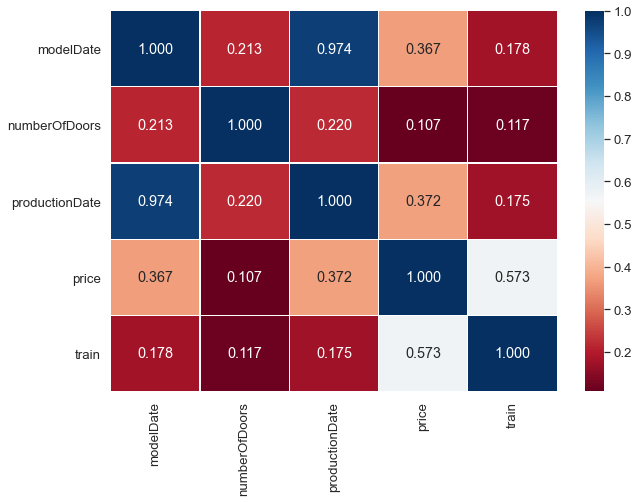

In [141]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, fmt='.3f', linewidths=0.1, cmap="RdBu")